# Integrating In-situ and Satellite Data in Drought monitoring

## Study Area - Greater Horn of Africa

### This Script is prepared by Abdillahi Osman Omar and Otobong Nse. 

## Load the required libraries

In [ ]:
import os
import rasterio
from rasterio.transform import from_origin
import numpy as np
import pandas as pd

## Task 1 Loading MODIS data

In [ ]:
raster_file = r"C:\Users\Zako3\Downloads\assignment2_geocomputing\data\modis-data\modis_2018_01.tif"
raster_file

'C:\\Users\\Zako3\\Downloads\\assignment2_geocomputing\\data\\modis-data\\modis_2018_01.tif'

In [ ]:
import rasterio
import os
dataset = rasterio.open(raster_file)
dataset

<open DatasetReader name='C:/Users/Zako3/Downloads/assignment2_geocomputing/data/modis-data/modis_2018_01.tif' mode='r'>

In [ ]:
print(type(dataset))

<class 'rasterio.io.DatasetReader'>


#### 1a) What is the width and height of the raster?

In [ ]:
dataset.width
dataset.height

print ("The width of this raster is: ", dataset.width)
print ("The height of this raster is: ", dataset.height)

The width of this raster is:  442
The height of this raster is:  311


#### 1b) What is the projection of the raster?

In [ ]:
dataset.crs
print ("The projection of this raster is: ", dataset.crs)

The projection of this raster is:  EPSG:4326


#### 1c) What is the extent of the raster (xMin, yMin, xMax, yMax)?

In [ ]:
dataset.transform
#print("The extent of this raster is: ", dataset.transform)

dataset.bounds
print("The extent of this raster is: ", dataset.bounds)

The extent of this raster is:  BoundingBox(left=33.9742840454003, bottom=-0.08983152841195174, right=41.91539115701687, top=5.497689538811472)


In [ ]:
# OR we can Print the extent of the raster dataset using indexing. 

print(f"The extent of this raster is: {dataset.bounds[0]}, {dataset.bounds[1]}, {dataset.bounds[2]}, {dataset.bounds[3]}")

The extent of this raster is: 33.9742840454003, -0.08983152841195174, 41.91539115701687, 5.497689538811472


#### 1d) How many bands are there in the raster?

In [ ]:
dataset.count
print("The number of bands of this raster is: ", dataset.count)

The number of bands of this raster is:  2


#### 1e) What are the minimum and maximum pixel values?

In [ ]:
import numpy as np


with rasterio.open(raster_file) as src:
    for band_num in range(1, src.count + 1):
        band_data = src.read(band_num)

        # Identify NaN values and replace them with a valid value (e.g., 0)
        nan_mask = np.isnan(band_data)
        band_data[nan_mask] = 0

        # Print the minimum and maximum values after handling NaN
        min_val, max_val = band_data.min(), band_data.max()
        print(f"Band {band_num}: Min = {min_val}, Max = {max_val}")

Band 1: Min = 0.0, Max = 4905.25
Band 2: Min = 0.0, Max = 5501.25


You can check information about the raster using the meta attribute.

Sometimes in our code, we need to use such functions to get an overview of the raster information rather than 
calling raster information one by one and vice versa. 


In [ ]:
metadata = dataset.meta
metadata

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 442,
 'height': 311,
 'count': 2,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.01796630568239043, 0.0, 33.9742840454003,
        0.0, -0.01796630568239043, 5.497689538811472)}

## Task 2 Loading vector (regions, stations) data

#### 2a) What are the fields in the regions and stations layers?

In [ ]:
from osgeo import ogr

In [ ]:
regions_ds = ogr.Open(r"C:\Users\Zako3\Downloads\assignment2_geocomputing\data\regions\regions.shp")
stations_ds = ogr.Open(r"C:\Users\Zako3\Downloads\assignment2_geocomputing\data\weather_stations.geojson")


layerRegions = regions_ds.GetLayer(0)

layerDefinition = layerRegions.GetLayerDefn()
fieldCount = layerDefinition.GetFieldCount()
print('Number of fields in study area are:', fieldCount)

for i in range(fieldCount):
    print('Attribute field:', layerDefinition.GetFieldDefn(i).GetName())

# FutureWarning: Neither ogr.UseExceptions() nor ogr.DontUseExceptions() has been explicitly called.
# In GDAL 4.0, exceptions will be enabled by default. To suppress this warning,
# explicitly set exception handling using ogr.UseExceptions() or ogr.DontUseExceptions().


Number of fields in study area are: 4
Attribute field: gid
Attribute field: county
Attribute field: pop2019
Attribute field: country


c:\Users\Zako3\anaconda3\envs\python_foundation\Lib\site-packages\osgeo\ogr.py:560: FutureWarning: Neither ogr.UseExceptions() nor ogr.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [ ]:
layerStations= stations_ds.GetLayer(0)

layerDefinition = layerStations.GetLayerDefn()
fieldCount = layerDefinition.GetFieldCount()
print('Number of fields in weather stations are:', fieldCount)

for i in range(fieldCount):
    print('Attribute field:', layerDefinition.GetFieldDefn(i).GetName())

Number of fields in weather stations are: 4
Attribute field: usaf
Attribute field: wban
Attribute field: station
Attribute field: ctry


#### 2b) What is the name and area of the largest region?

In [ ]:

# Initialize variables to store information about the largest region
max_area = 0
largest_region_name = None

# Iterate through features in the layer
for feature in layerRegions:
    # Get the area of the current feature
    area = feature.GetGeometryRef().GetArea()

    # Check if the current feature has a larger area
    if area > max_area:
        max_area = area
        largest_region_name = feature.GetField("county") 


print("Name of largest region in our study area is :", largest_region_name)
print("Area:", max_area, "square units")

Name of largest region in our study area is : Marsabit
Area: 5.773339166252817 square units


#### 2c) What is the sum of population of the regions?

In [ ]:
# Initialize variables to store information about the population 
total_pop = 0

# Iterate through features in the layer
for feature in layerRegions:
    # Get the population of the current feature
    population = feature.GetField("pop2019")  

    # Add the population to the total
    total_pop += population if population is not None else 0  # Handle cases where population is None

print("Total Population in our study area:", total_pop)

Total Population in our study area: 4191810


#### 2d) Which region(s) do not have a weather station?

In [ ]:
# Extract unique station values from the "station" field in the stations dataset
regions_with_stations = set(
    feature.GetField("station") for feature in stations_ds.GetLayer(0)
)

# Identify regions without associated weather stations by comparing counties
regions_without_stations = [
    feature.GetField("county")
    for feature in regions_ds.GetLayer(0)
    if feature.GetField("county") not in regions_with_stations
]

# Check if there are regions without weather stations and print the result
if regions_without_stations:
    print("Regions do not have weather stations:", regions_without_stations)
else:
    print("Regions have weather stations.")

# We validated this task using QGIS --- 

Regions do not have weather stations: ['Samburu']


#### 2e) Determine the "usaf" of the station within Marsabit region.

In [ ]:

# "usaf" is the attribute field in the weather stations layer
usaf_attribute = None

# Iterate through features in the weather stations layer
for feature in layerStations:
    region_name = feature.GetField("station")  
    
    # Check if the current station is within the Marsabit region
    if region_name == "Marsabit":
        usaf_attribute = feature.GetField("usaf")  
        break  # Stop iterating once the station within Marsabit is found, also we can use stop


if usaf_attribute is not None:
    print(f"The 'usaf' attribute value of the station within Marsabit region is: {usaf_attribute}")
else:
    print("No station found within Marsabit region.")


The 'usaf' attribute value of the station within Marsabit region is: 636410


In this task 2, we have loaded both vector datasets of study area regions and weather stations. 
We have explored the dataset by checking the field names of both regions and weather stations layer, 
Besides that, we find the name of the largest region in our study area which is Marsabit, and region which does not 
have a weather station which is Samburu. 


This is followed by, the sum of the population in our study area which we will use in our analysis of drought monitoring in the next analysis, and finally we have observed the regions that do not have weather stations and station IDs for the Marsabit region. 

To ensure the accuracy and correctness of all tasks in both Task 1 and Task 2, we have conducted thorough validation using QGIS.  


## Task 3 NDVI Analysis and Visualization

#### 3a) Generate NDVI dataset for each month (each raster file).

In [ ]:
import os
import rasterio
from rasterio.transform import from_origin
import numpy as np

def calculate_ndvi(input_file, output_file):
    with rasterio.open(input_file) as src:
        # Read Red and NIR bands
        red_band = src.read(1)
        nir_band = src.read(2)

        # Calculate NDVI
        ndvi = (nir_band - red_band) / (nir_band + red_band)

        # Write NDVI to a new raster file
        profile = src.profile
        profile.update(dtype=rasterio.float32, count=1)

        with rasterio.open(output_file, 'w', **profile) as dst:
            dst.write(ndvi.astype(rasterio.float32), 1)

def generate_ndvi_for_each_month(data_folder, output_folder):
    # Iterate through all files in the specified folder
    for filename in os.listdir(data_folder):
        if filename.endswith(".tif") and filename.startswith("modis_"):
            month = filename.split("_")[2]
            year = filename.split("_")[1]

            # Generate NDVI filename
            ndvi_filename = f"ndvi_{year}_{month}.tif"
            ndvi_filepath = os.path.join(output_folder, ndvi_filename)

            # Calculate and save NDVI
            calculate_ndvi(os.path.join(data_folder, filename), ndvi_filepath)
            print(f"NDVI for {year}-{month} has been generated and saved at {ndvi_filepath}")

# path to our dataset 
data_folder = r"C:\Users\Zako3\Downloads\assignment2_geocomputing\data\modis-data"
output_folder = r"C:\Users\Zako3\Downloads\assignment2_geocomputing\output"
generate_ndvi_for_each_month(data_folder, output_folder)


NDVI for 2018-01.tif has been generated and saved at C:\Users\Zako3\Downloads\assignment2_geocomputing\output\ndvi_2018_01.tif.tif
NDVI for 2018-02.tif has been generated and saved at C:\Users\Zako3\Downloads\assignment2_geocomputing\output\ndvi_2018_02.tif.tif
NDVI for 2018-03.tif has been generated and saved at C:\Users\Zako3\Downloads\assignment2_geocomputing\output\ndvi_2018_03.tif.tif
NDVI for 2018-04.tif has been generated and saved at C:\Users\Zako3\Downloads\assignment2_geocomputing\output\ndvi_2018_04.tif.tif
NDVI for 2018-05.tif has been generated and saved at C:\Users\Zako3\Downloads\assignment2_geocomputing\output\ndvi_2018_05.tif.tif
NDVI for 2018-06.tif has been generated and saved at C:\Users\Zako3\Downloads\assignment2_geocomputing\output\ndvi_2018_06.tif.tif
NDVI for 2018-07.tif has been generated and saved at C:\Users\Zako3\Downloads\assignment2_geocomputing\output\ndvi_2018_07.tif.tif
NDVI for 2018-08.tif has been generated and saved at C:\Users\Zako3\Downloads\assig

#### 3b) Visualize the NDVI for May of years 2018 to 2022.

In [ ]:
import os
import matplotlib.pyplot as plt
import rasterio

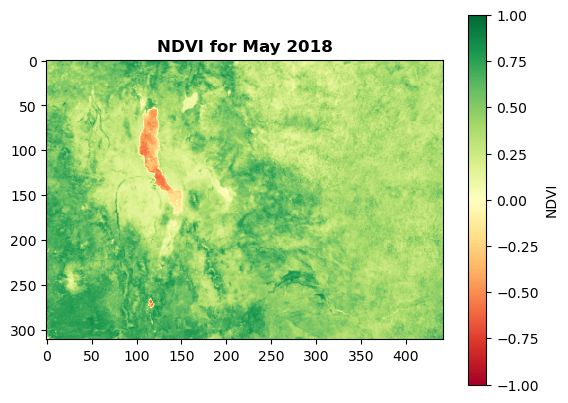

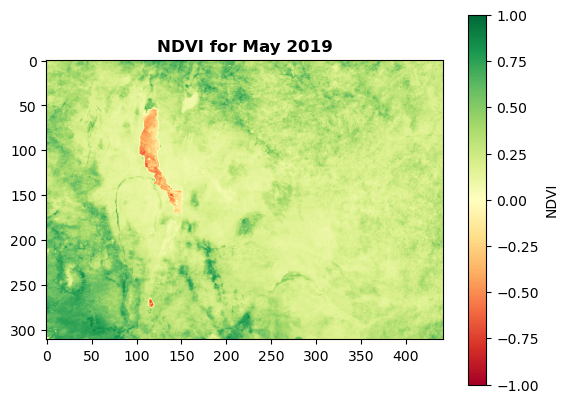

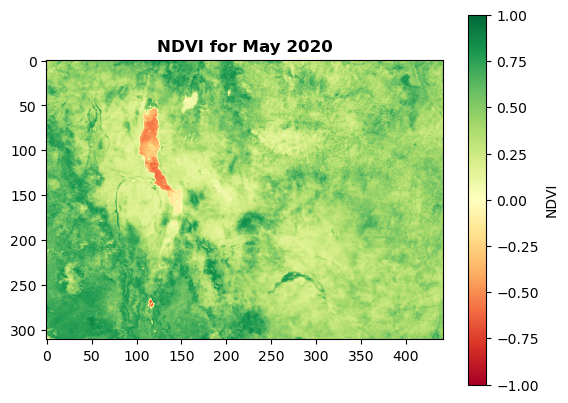

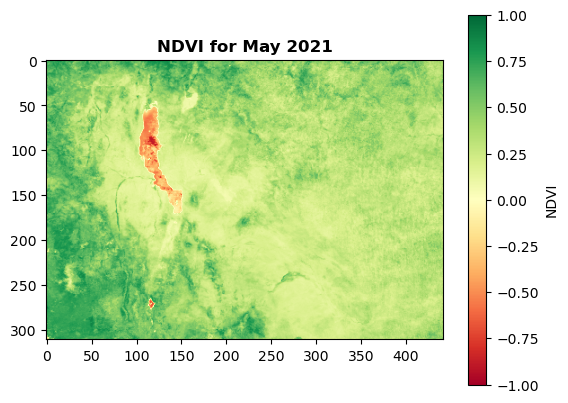

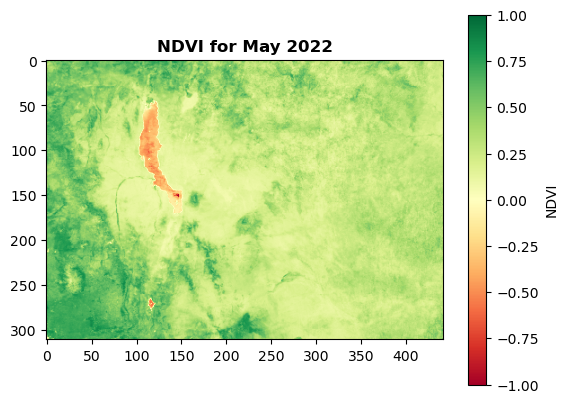

In [ ]:
def plot_ndvi(ndvi_file, title):
    with rasterio.open(ndvi_file) as src:  #Open the NDVI raster file using rasterio
        ndvi = src.read(1) # Read the NDVI data from the raster file

        plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1) # Plot the NDVI data using a color map
        plt.colorbar(label='NDVI')
        plt.title(title, fontweight='bold')
        plt.tight_layout
        plt.show()

def visualize_ndvi_for_years(output_folder, years):
    for year in years: # Iterate through each year in the list of years
        ndvi_file = os.path.join(output_folder, f'ndvi_{year}_05.tif.tif')
        # Construct the NDVI file path for the specific year
        title = f'NDVI for May {year}'
        plot_ndvi(ndvi_file, title)

output_folder = r"C:\Users\Zako3\Downloads\assignment2_geocomputing\output"
years_to_visualize = ['2018', '2019', '2020', '2021', '2022']
visualize_ndvi_for_years(output_folder, years_to_visualize)

In [ ]:
# we can use the plt.subplots() function to create a single figure with multiple axes
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

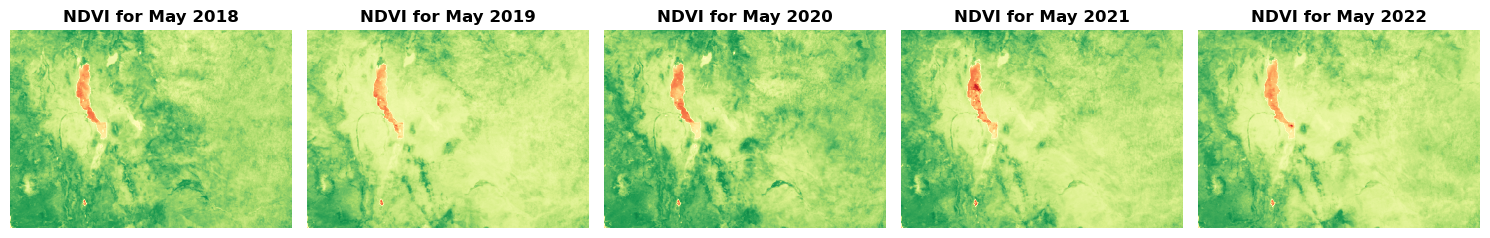

In [ ]:
def plot_ndvi(ndvi_file, title, ax):
    with rasterio.open(ndvi_file) as src:
        ndvi = src.read(1)

        ax.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
        ax.set_title(title, fontweight='bold')
        ax.set_axis_off()

def visualize_ndvi_for_years(output_folder, years):
    num_years = len(years)
    fig, axes = plt.subplots(1, num_years, figsize=(15, 5))

    for i, year in enumerate(years):
        ndvi_file = os.path.join(output_folder, f'ndvi_{year}_05.tif.tif')
        title = f'NDVI for May {year}'
        plot_ndvi(ndvi_file, title, axes[i])

    plt.tight_layout()
    plt.show()

output_folder = r"C:\Users\Zako3\Downloads\assignment2_geocomputing\output"
years_to_visualize = ['2018', '2019', '2020', '2021', '2022']
visualize_ndvi_for_years(output_folder, years_to_visualize)

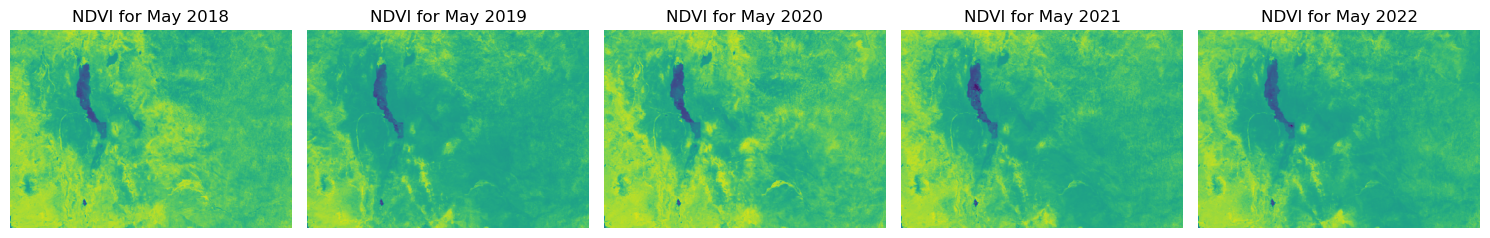

In [ ]:
def plot_ndvi(ndvi_file, title, ax):
    # Open the NDVI raster file
    with rasterio.open(ndvi_file) as src:
        # Read the NDVI data from the raster
        ndvi = src.read(1)

        # Choose a colormap and plot the NDVI data
        ax.imshow(ndvi, cmap='viridis', vmin=-1, vmax=1)
        ax.set_title(title)
        ax.set_axis_off()

def visualize_ndvi_for_years(output_folder, years):
    # Determine the number of years to visualize
    num_years = len(years)

    # Create a subplot grid for the specified number of years
    fig, axes = plt.subplots(1, num_years, figsize=(15, 5))

    # Iterate through each year and plot the corresponding NDVI
    for i, year in enumerate(years):
        # Generate the NDVI file path based on the year
        ndvi_file = os.path.join(output_folder, f'ndvi_{year}_05.tif.tif')

        # Generate the title for the NDVI plot
        title = f'NDVI for May {year}'

        # Call the plot_ndvi function to visualize NDVI for the current year
        plot_ndvi(ndvi_file, title, axes[i])

    # Adjust layout for better visualization
    plt.tight_layout()

    # Display the NDVI plots
    plt.show()

# Specify the output folder and years to visualize
output_folder = r"C:\Users\Zako3\Downloads\assignment2_geocomputing\output"
years_to_visualize = ['2018', '2019', '2020', '2021', '2022']

visualize_ndvi_for_years(output_folder, years_to_visualize)


#### 3c) Calculate average NDVI per Month.

In [ ]:
import os
import numpy as np
import pandas as pd
import rasterio

def compute_average_ndvi(ndvi_folder):
    monthly_avg_ndvi = {f'{month:02}': {} for month in range(1, 13)}

    # Loop through each NDVI image file
    for filename in os.listdir(ndvi_folder):
        if filename.startswith("ndvi_") and filename.endswith(".tif"):
            # the file naming convention is "ndvi_YYYY_MM.tif"
            year = int(filename[5:9])
            month = int(filename[10:12])

            # Read NDVI band
            ndvi_path = os.path.join(ndvi_folder, filename)
            with rasterio.open(ndvi_path) as src:
                ndvi_band = src.read(1).astype(float)

                # Compute average NDVI
                avg_ndvi = np.nanmean(ndvi_band)

            # Update dictionary with yearly averages
            monthly_avg_ndvi[f'{month:02}'][year] = round(avg_ndvi, 3)

    return monthly_avg_ndvi

def main():
    ndvi_folder = r"C:\Users\Zako3\Downloads\assignment2_geocomputing\output"
    monthly_avg_ndvi = compute_average_ndvi(ndvi_folder)

    # Convert the dictionary to a pandas DataFrame
    df = pd.DataFrame(monthly_avg_ndvi)
    df.index.name = 'Month'

    # Display the DataFrame
    print(df)

if __name__ == "__main__":
    main()


          01     02     03     04     05     06     07     08     09     10  \
Month                                                                         
2018   0.252  0.224  0.319  0.420  0.433  0.369  0.311  0.278  0.282  0.273   
2019   0.279  0.243  0.242  0.259  0.288  0.280  0.292  0.285  0.266  0.322   
2020   0.395  0.366  0.323  0.375  0.438  0.362  0.329  0.309  0.304  0.314   
2021   0.298  0.263  0.265  0.285  0.358  0.316  0.241  0.277  0.278  0.288   
2022   0.276  0.249  0.237  0.234  0.326  0.291  0.244  0.266  0.264  0.223   

          11     12  
Month                
2018   0.311  0.333  
2019   0.440  0.500  
2020   0.397  0.353  
2021   0.287  0.271  
2022   0.242  0.271  


#### 3d) Generate 5 multiline charts, each pertaining to one year.  
Each chart presents the average monthly NDVI for the year, providing the means to compare the changes in the NDVI in different months of the year. Additionally, comparing the charts allow you to understand the overall change in the NDVI over years.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio

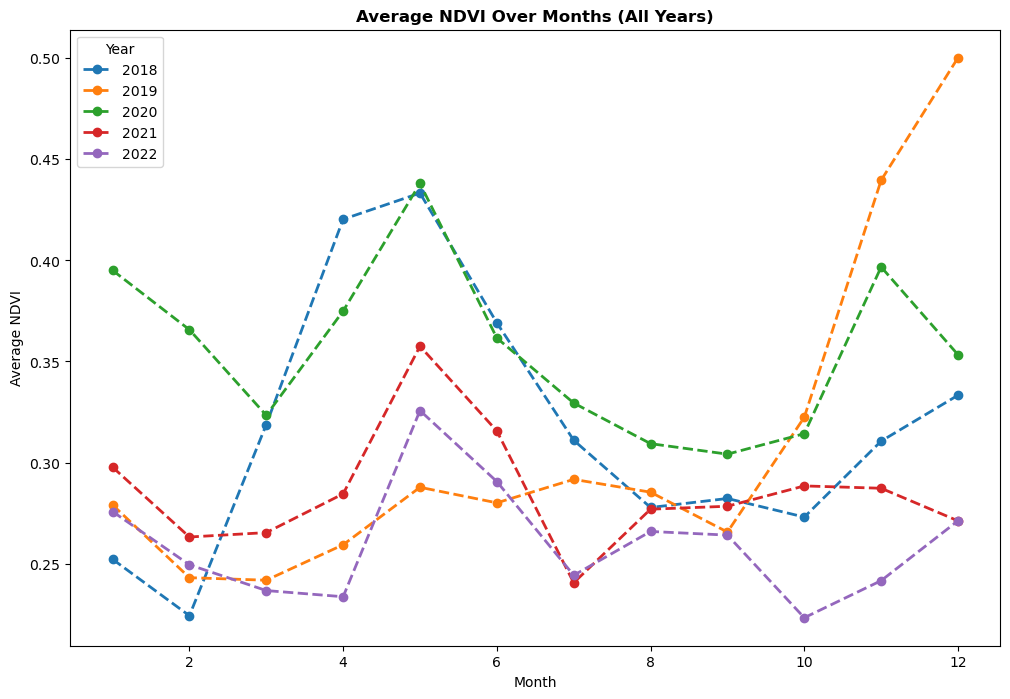

In [ ]:
def compute_average_ndvi(ndvi_folder):
    yearly_avg_ndvi = {}

    # Loop through each NDVI image file created
    for filename in os.listdir(ndvi_folder):
        if filename.startswith("ndvi_") and filename.endswith(".tif"):
            # the file naming convention is "ndvi_YYYY_MM.tif"
            year = int(filename[5:9])

            # Read NDVI band
            ndvi_path = os.path.join(ndvi_folder, filename)
            with rasterio.open(ndvi_path) as src:
                ndvi_band = src.read(1).astype(float)

                # Compute average NDVI
                avg_ndvi = np.nanmean(ndvi_band)

            # Update dictionary with yearly averages
            if year not in yearly_avg_ndvi:
                yearly_avg_ndvi[year] = [avg_ndvi]
            else:
                yearly_avg_ndvi[year].append(avg_ndvi)

    return yearly_avg_ndvi

def plot_all_and_individual_charts(yearly_avg_ndvi):
    # Extract years and NDVI values
    years = list(yearly_avg_ndvi.keys())
    ndvi_values = list(yearly_avg_ndvi.values())

    # Check if there is data to plot
    if not years or not ndvi_values:
        print("No data found for plotting.")
        return

    # Plot all years on one chart
    plt.figure(figsize=(12, 8))
    for year, ndvi_values_year in zip(years, ndvi_values):
        plt.plot(range(1, len(ndvi_values_year) + 1), ndvi_values_year, label=str(year), linestyle='--', marker='o', linewidth=2)

    plt.title('Average NDVI Over Months (All Years)', fontweight='bold')
    plt.xlabel('Month')
    plt.ylabel('Average NDVI')
    plt.legend(title='Year')
    plt.show()

def main():
    ndvi_folder = r"C:\Users\Zako3\Downloads\assignment2_geocomputing\output"
    yearly_avg_ndvi = compute_average_ndvi(ndvi_folder)

    # Plot all years on one chart and individual charts for each year
    plot_all_and_individual_charts(yearly_avg_ndvi)

if __name__ == "__main__":
    main()


We can plot all years in separate charts to better explore average NDVI in each year. 

As well we can see, in which years the NDVI value were above average and also below average NDVI. 

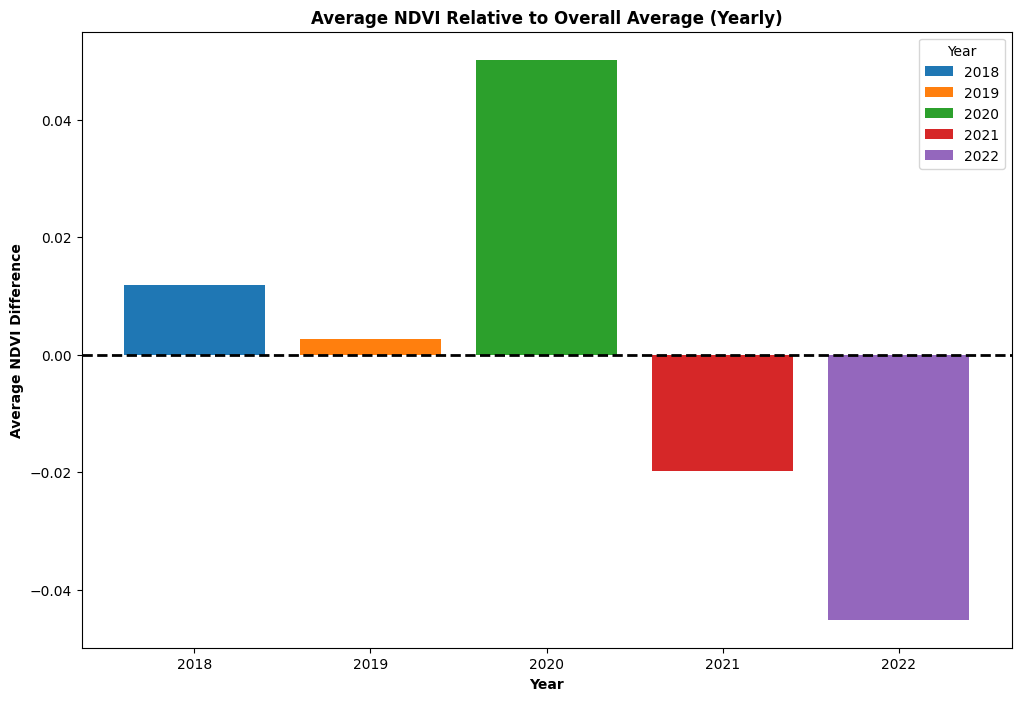

In [ ]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def compute_average_ndvi(ndvi_folder):
    yearly_avg_ndvi = {}

    # Loop through each NDVI image file created
    for filename in os.listdir(ndvi_folder):
        if filename.startswith("ndvi_") and filename.endswith(".tif"):
            # the file naming convention is "ndvi_YYYY_MM.tif"
            year = int(filename[5:9])

            # Read NDVI band
            ndvi_path = os.path.join(ndvi_folder, filename)
            with rasterio.open(ndvi_path) as src:
                ndvi_band = src.read(1).astype(float)

                # Compute average NDVI
                avg_ndvi = np.nanmean(ndvi_band)

            # Update dictionary with yearly averages
            if year not in yearly_avg_ndvi:
                yearly_avg_ndvi[year] = [avg_ndvi]
            else:
                yearly_avg_ndvi[year].append(avg_ndvi)

    return yearly_avg_ndvi

def plot_average_ndvi_bar_chart(yearly_avg_ndvi):
    # Calculate overall average NDVI
    overall_avg_ndvi = np.nanmean([np.nanmean(ndvi_values) for ndvi_values in yearly_avg_ndvi.values()])

    # Plot bar chart with yearly averages relative to overall average
    plt.figure(figsize=(12, 8))
    for year, ndvi_values_year in yearly_avg_ndvi.items():
        plt.bar(year, np.nanmean(ndvi_values_year) - overall_avg_ndvi, label=str(year))

    plt.axhline(0, color='black', linestyle='--', linewidth=2)  # Horizontal line at overall average
    plt.title('Average NDVI Relative to Overall Average (Yearly)', fontweight='bold')
    plt.xlabel('Year', fontweight='bold')
    plt.ylabel('Average NDVI Difference', fontweight='bold')
    plt.legend(title='Year')
    plt.show()

def main():
    ndvi_folder = r"C:\Users\otote\OneDrive\Desktop\QUARTILE 2\Scientific Geocomputing\Assignments\Assignment 2\output"
    yearly_avg_ndvi = compute_average_ndvi(ndvi_folder)

    # Plot bar chart with yearly averages relative to overall average
    plot_average_ndvi_bar_chart(yearly_avg_ndvi)

if __name__ == "__main__":
    main()

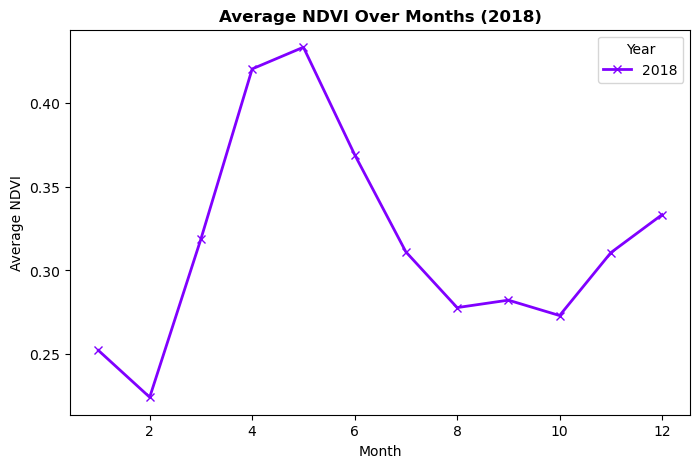

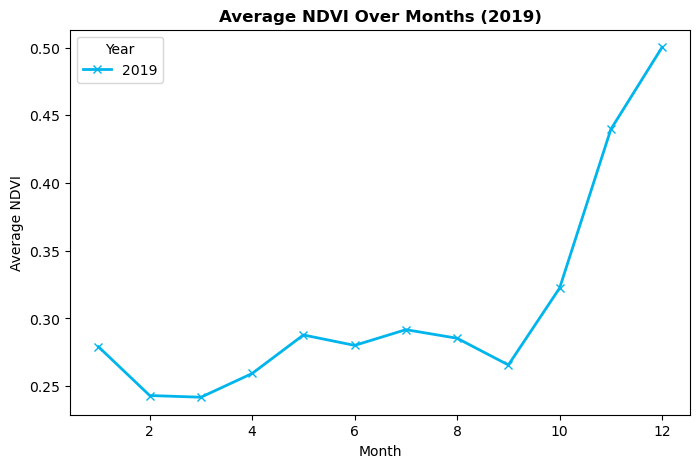

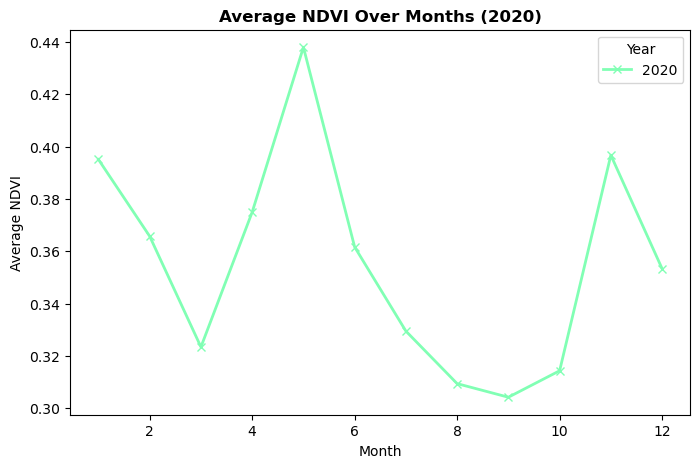

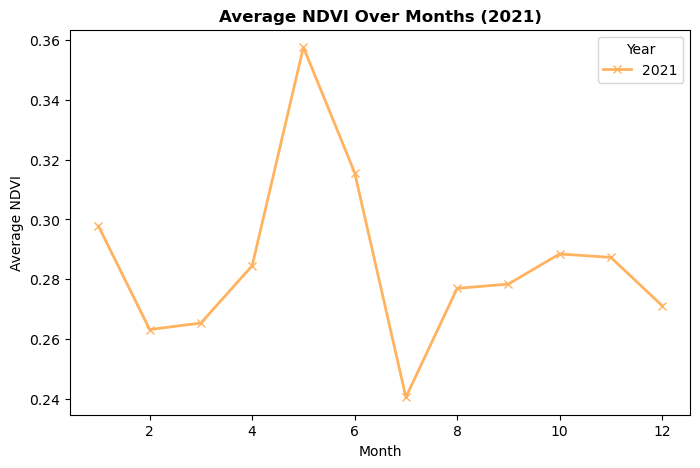

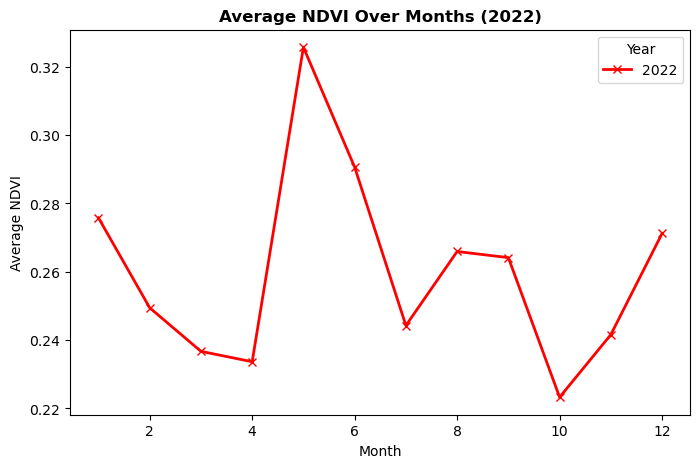

In [ ]:
def compute_average_ndvi(ndvi_folder):
    yearly_avg_ndvi = {}

    # Loop through each NDVI image file created
    for filename in os.listdir(ndvi_folder):
        if filename.startswith("ndvi_") and filename.endswith(".tif"):
            # the file naming convention is "ndvi_YYYY_MM.tif"
            year = int(filename[5:9])

            # Read NDVI band
            ndvi_path = os.path.join(ndvi_folder, filename)
            with rasterio.open(ndvi_path) as src:
                ndvi_band = src.read(1).astype(float)

                # Compute average NDVI
                avg_ndvi = np.nanmean(ndvi_band)

            # Update dictionary with yearly averages
            if year not in yearly_avg_ndvi:
                yearly_avg_ndvi[year] = [avg_ndvi]
            else:
                yearly_avg_ndvi[year].append(avg_ndvi)

    return yearly_avg_ndvi

def plot_all_and_individual_charts(yearly_avg_ndvi):
    # Extract years and NDVI values
    years = list(yearly_avg_ndvi.keys())
    ndvi_values = list(yearly_avg_ndvi.values())

    # Check if there is data to plot
    if not years or not ndvi_values:
        print("No data found for plotting.")
        return
        
# Plot individual charts for each year
    for year, ndvi_values_year in yearly_avg_ndvi.items():
        plt.figure(figsize=(8, 5))
        plt.plot(range(1, len(ndvi_values_year) + 1), 
                 ndvi_values_year, label=str(year), linestyle='-', marker='x', 
                 linewidth=2, color=plt.cm.rainbow(np.linspace(0, 1, len(years)))[years.index(year)])

        plt.title(f'Average NDVI Over Months ({year})', fontweight='bold')
        plt.xlabel('Month')
        plt.ylabel('Average NDVI')
        plt.legend(title='Year')

        plt.show()
        
def main():
    ndvi_folder = r"C:\Users\Zako3\Downloads\assignment2_geocomputing\output"
    yearly_avg_ndvi = compute_average_ndvi(ndvi_folder)

    # Plot all years on one chart and individual charts for each year
    plot_all_and_individual_charts(yearly_avg_ndvi)

if __name__ == "__main__":
    main()


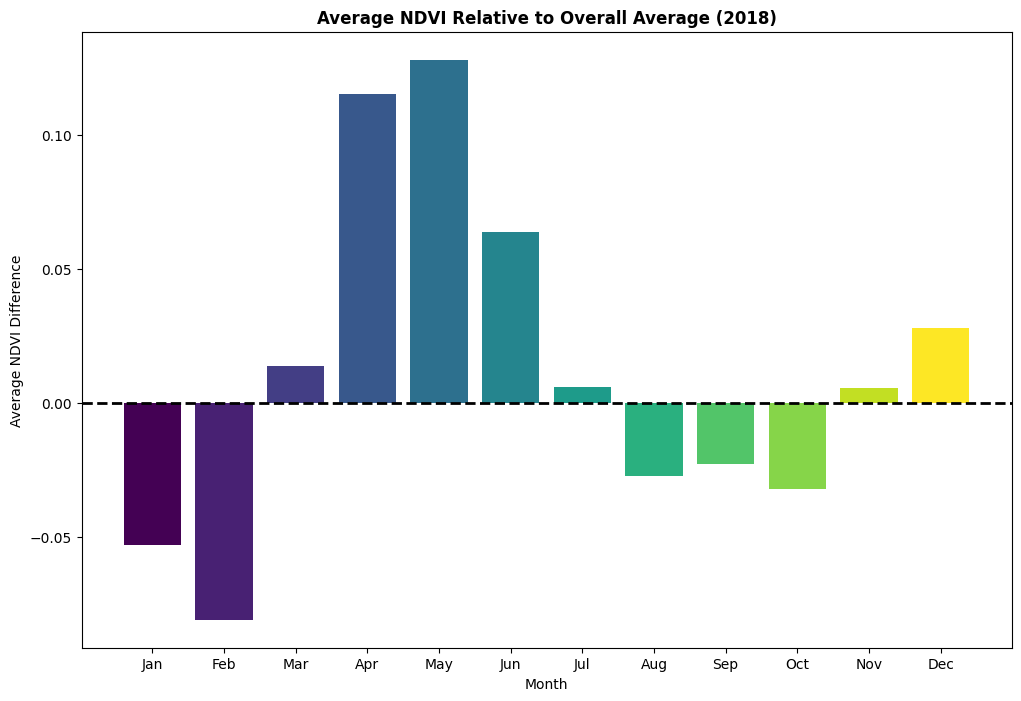

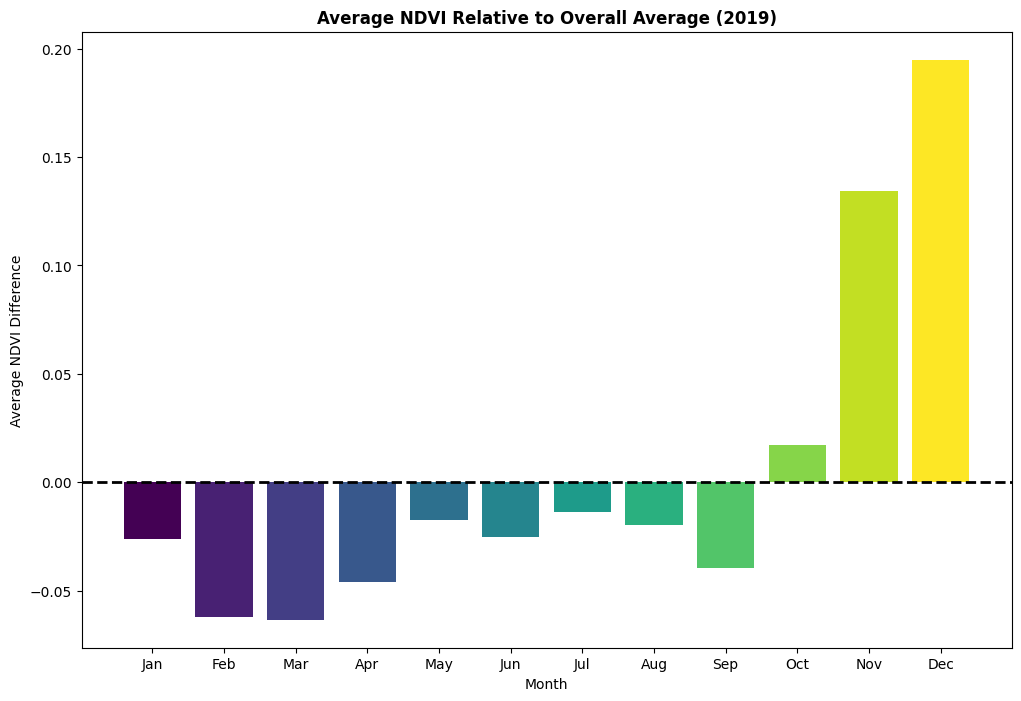

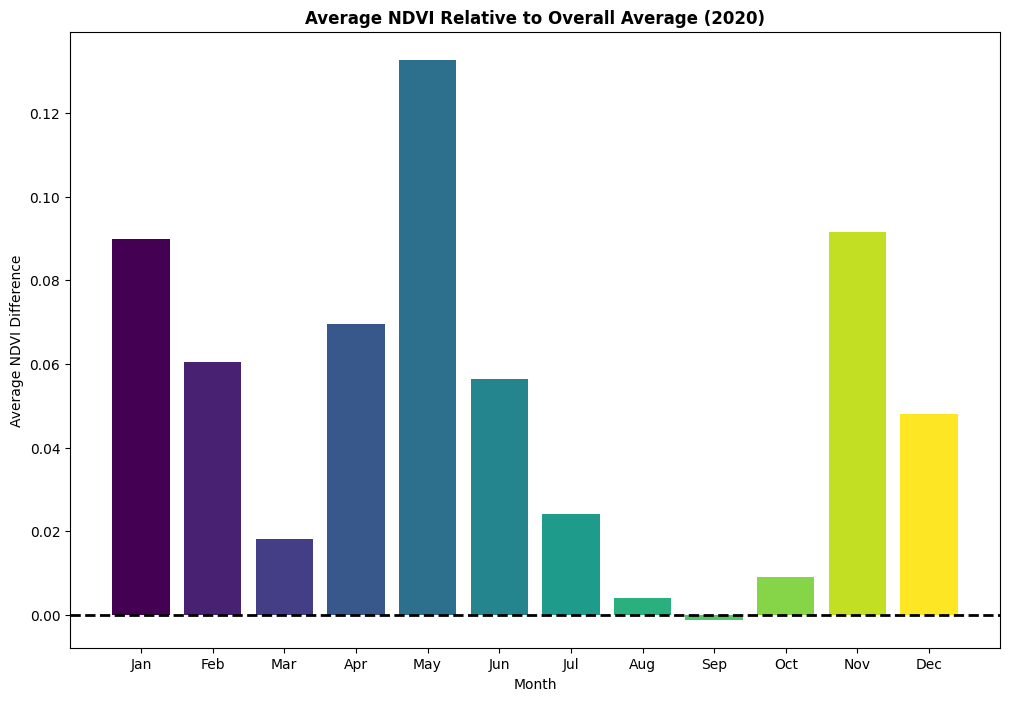

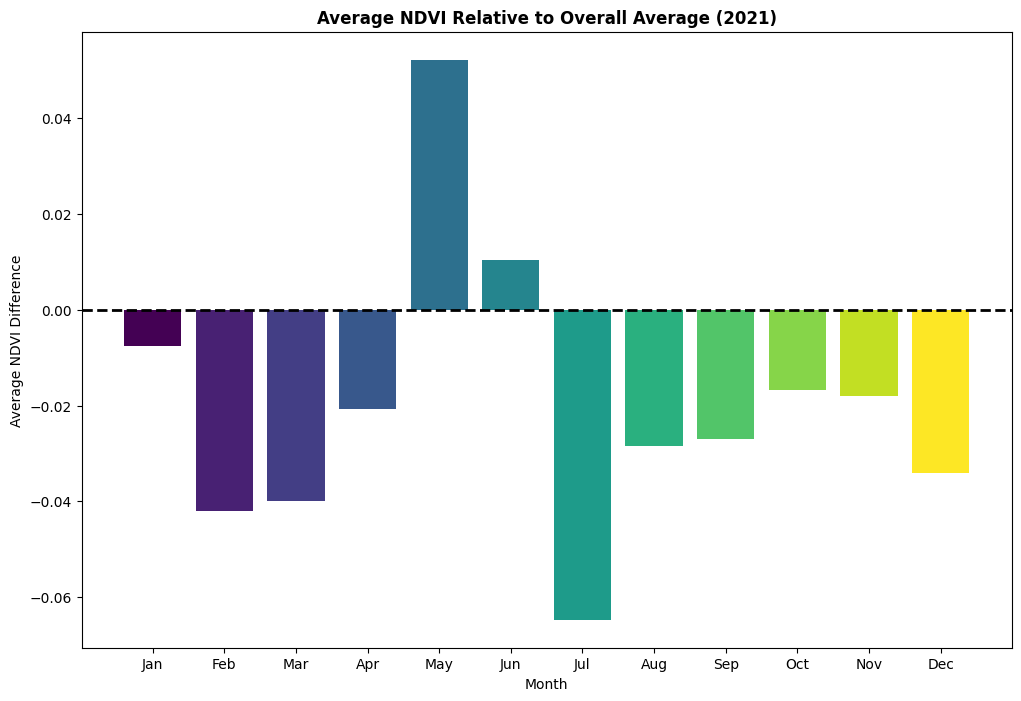

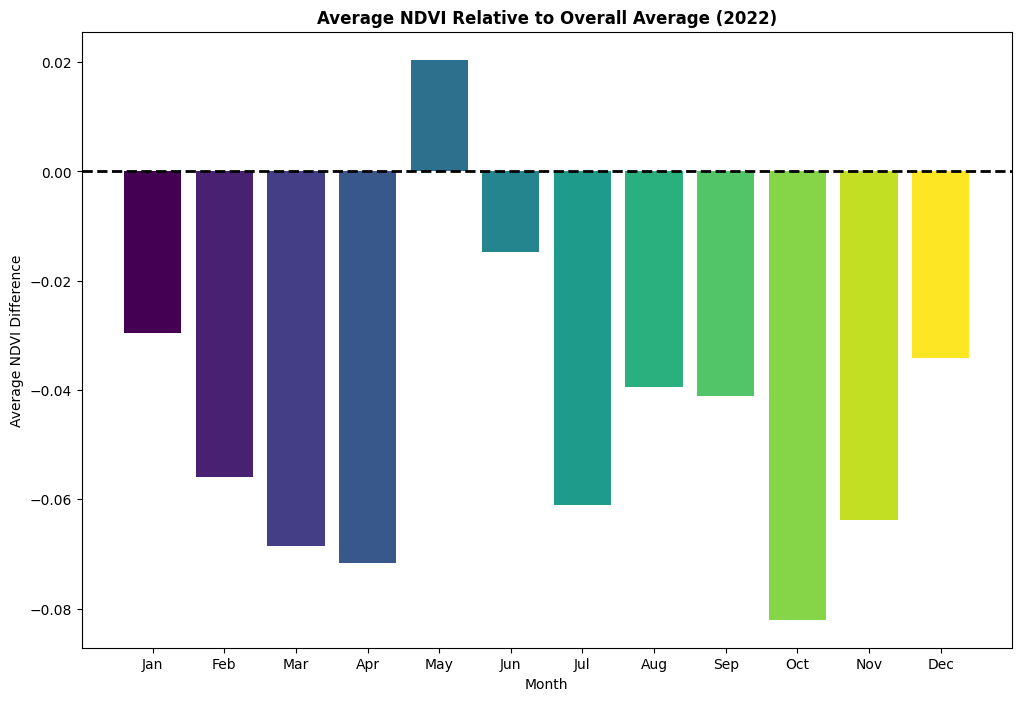

In [ ]:
import calendar
def compute_average_ndvi(ndvi_folder):
    yearly_avg_ndvi = {year: {} for year in range(2018, 2023)}

    # Loop through each NDVI image file created
    for filename in os.listdir(ndvi_folder):
        if filename.startswith("ndvi_") and filename.endswith(".tif"):
            # the file naming convention is "ndvi_YYYY_MM.tif"
            year = int(filename[5:9])
            month = int(filename[10:12])

            # Read NDVI band
            ndvi_path = os.path.join(ndvi_folder, filename)
            with rasterio.open(ndvi_path) as src:
                ndvi_band = src.read(1).astype(float)

                # Compute average NDVI
                avg_ndvi = np.nanmean(ndvi_band)

            # Update dictionary with yearly and monthly averages
            if month not in yearly_avg_ndvi[year]:
                yearly_avg_ndvi[year][month] = [avg_ndvi]
            else:
                yearly_avg_ndvi[year][month].append(avg_ndvi)

    return yearly_avg_ndvi

def plot_yearly_average_ndvi_bar_charts(yearly_avg_ndvi):
    # Calculate overall average NDVI
    overall_avg_ndvi = np.nanmean([np.nanmean(ndvi_values_month) for yearly_ndvi in yearly_avg_ndvi.values() for ndvi_values_month in yearly_ndvi.values()])

    # Plot bar charts for each year with different colors for each month
    for year, monthly_avg_ndvi in yearly_avg_ndvi.items():
        months = list(monthly_avg_ndvi.keys())
        ndvi_values = [np.nanmean(ndvi_values_month) - overall_avg_ndvi for ndvi_values_month in monthly_avg_ndvi.values()]

        # Use a colormap for different colors for each month
        colors = plt.cm.viridis(np.linspace(0, 1, len(months)))

        plt.figure(figsize=(12, 8))
        plt.bar(months, ndvi_values, color=colors)
        plt.axhline(0, color='black', linestyle='--', linewidth=2)  # Horizontal line at overall average
        plt.title(f'Average NDVI Relative to Overall Average ({year})', fontweight='bold')
        plt.xlabel('Month')
        plt.ylabel('Average NDVI Difference')
        plt.xticks(months, [calendar.month_abbr[month] for month in months])  # Use month names on x-axis
        plt.show()

def main():
    ndvi_folder = r"C:\Users\otote\OneDrive\Desktop\QUARTILE 2\Scientific Geocomputing\Assignments\Assignment 2\output"
    yearly_avg_ndvi = compute_average_ndvi(ndvi_folder)

    # Plot bar charts for each year with monthly averages relative to overall average and different colors for each month
    plot_yearly_average_ndvi_bar_charts(yearly_avg_ndvi)

if __name__ == "__main__":
    main()

The implemented workflow effectively calculated and visualized (NDVI) for the research area using MODIS data. The NDVI rasters for May from 2018 to 2022 were created, providing insights into the health of the vegetation throughout time. 

The average NDVI per month was determined, and the five multiline charts that resulted illustrated the yearly fluctuations in NDVI, allowing for a thorough comparison of vegetation dynamics over months and years. 

This analysis contributes to a better understanding of the overall trends and changes in plant cover in the studied area over the selected time period.

## Task 4 NDVI Analysis for Marsabit region

In [ ]:
!pip install rasterstats

### 4a) Visualize the long-term monthly average NDVI for May for the Marsabit region.

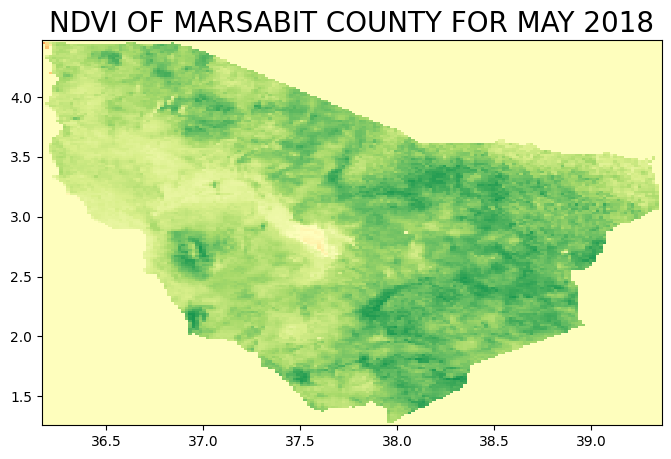

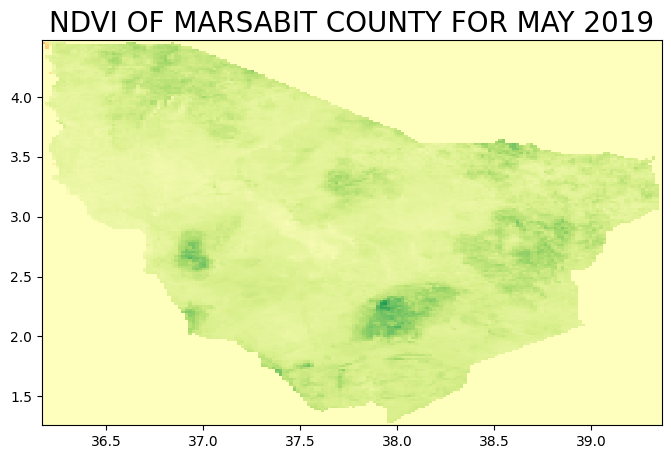

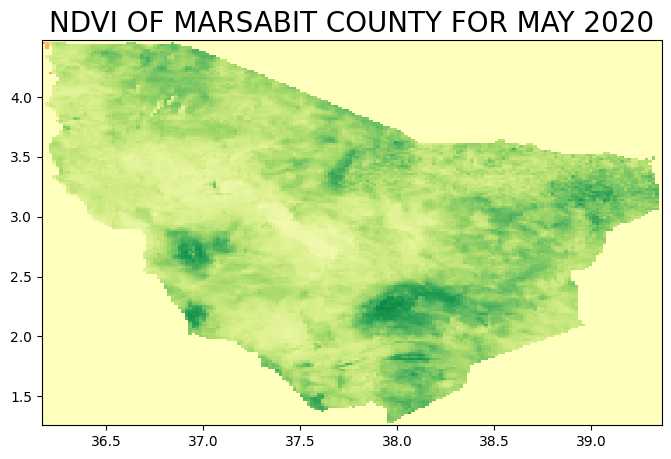

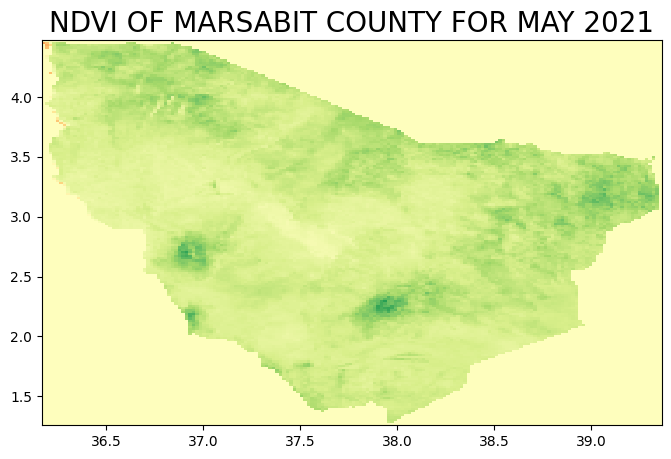

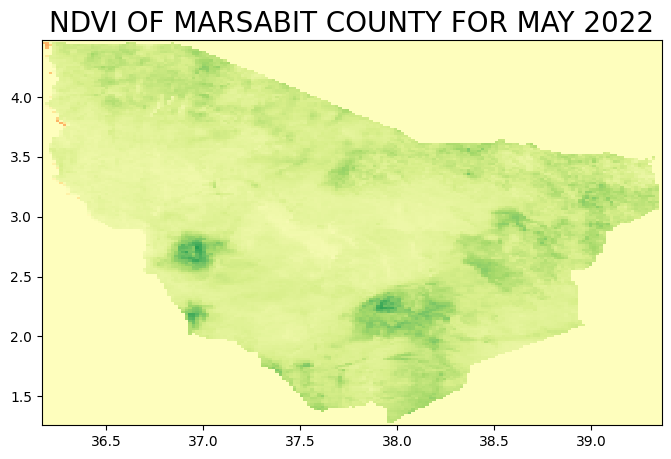

In [ ]:
import os
import geopandas as gpd
import rasterio
from rasterio.mask import mask
import matplotlib.pyplot as plt

def clip_ndvi(ndvi_file, clip_polygon, save_folder):
    with rasterio.open(ndvi_file) as src:
        out_image, out_transform = mask(src, [clip_polygon], crop=True)
        out_meta = src.meta.copy()

        out_meta.update({
            "driver": "GTiff",
            "height": out_image.shape[1],
            "width": out_image.shape[2],
            "transform": out_transform
        })

        # Extract the year from the ndvi_file name
        year = ndvi_file.split("_")[3][:6]
        save_path = os.path.join(save_folder, f'clipped_ndvi_{year}_Marsabit.tif')

        with rasterio.open(save_path, "w", **out_meta) as dest:
            dest.write(out_image)

        # Display the clipped NDVI image
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.imshow(out_image[0], cmap='RdYlGn', vmin=-1, vmax=1, extent=[out_transform[2], out_transform[2] + out_transform[0] * out_image.shape[2],
                                                                      out_transform[5] + out_transform[4] * out_image.shape[1], out_transform[5]],
                  interpolation='nearest', origin='upper', aspect='auto')
        ax.set_title(f'NDVI OF MARSABIT COUNTY FOR MAY {year}', fontsize=20)
        ax.set_axis_on()
        ax.set_facecolor('white')  # Set white background
        plt.show()

# Define paths
save_folder = r"C:\Users\otote\OneDrive\Desktop\QUARTILE 2\Scientific Geocomputing\Assignments\Assignment 2\visualized_output"
shapefile_path = r"C:\Users\otote\OneDrive\Desktop\QUARTILE 2\Scientific Geocomputing\Assignments\Assignment 2\regions\regions\regions.shp"

# Define the clip polygon (Marsabit County in this case)
clip_polygon = gpd.read_file(shapefile_path)[gpd.read_file(shapefile_path)['county'] == 'Marsabit'].geometry.squeeze()

# List of NDVI files to clip
ndvi_files = [os.path.join(save_folder, f'clipped_ndvi_{year}_05.tif') for year in range(2018, 2023)]

# Clip NDVI images and save
for ndvi_file in ndvi_files:
    clip_ndvi(ndvi_file, clip_polygon, save_folder)



#### 4b) Generate chart(s) comparing the average NDVI of the region in different years. Fill free to try different charting styles.

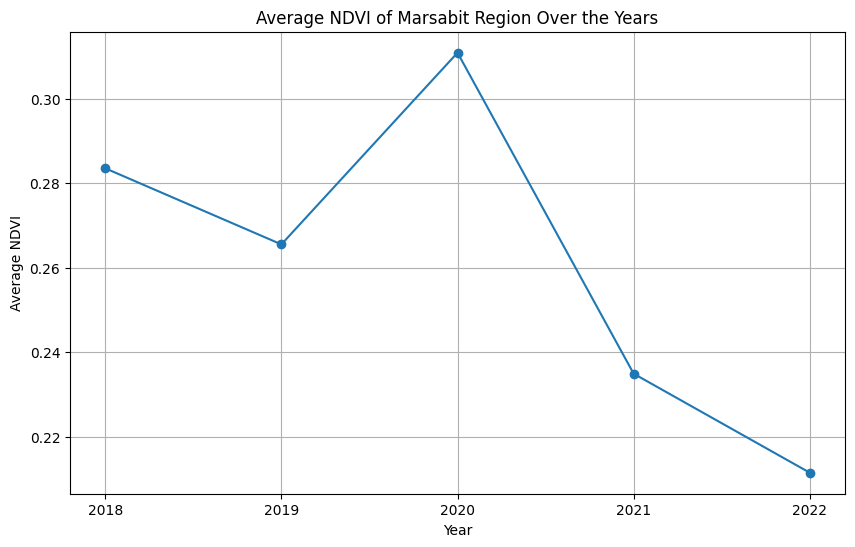

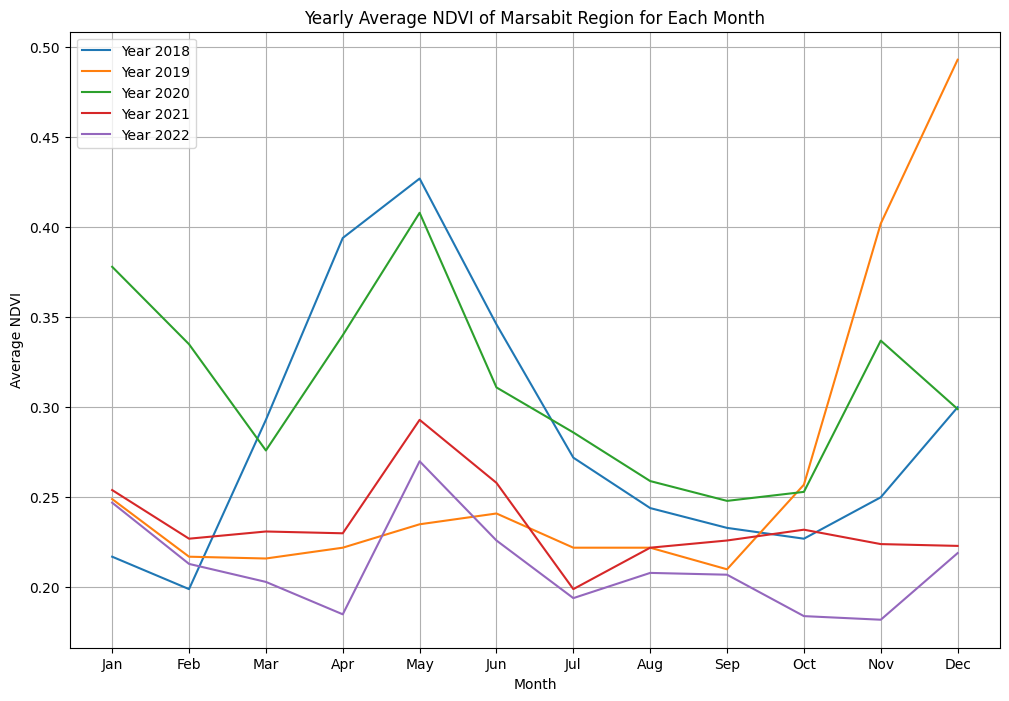

In [ ]:
import os
import geopandas as gpd
import rasterio
from rasterstats import zonal_stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar  # Added import for month names

# We create a function  that computes the average ndvi at the region from ndvi tif images 
# and a shapefile of the area of interest

def compute_average_ndvi(ndvi_folder, shapefile_path):
    # Read the shapefile containing the region
    gdf = gpd.read_file(shapefile_path)

    # Initialize dictionaries to store average NDVI values for each month and year
    yearly_avg_ndvi = {year: [] for year in range(2018, 2023)}
    monthly_avg_ndvi = {f'{month:02}': {year: [] for year in range(2018, 2023)} for month in range(1, 13)}

    # Loop through each NDVI image file
    for filename in os.listdir(ndvi_folder):
        if filename.startswith("ndvi_") and filename.endswith(".tif"):
            # Assuming the file naming convention is "ndvi_YYYY_MM.tif"
            year = int(filename[5:9])
            month = int(filename[10:12])

            # Read NDVI raster
            ndvi_path = os.path.join(ndvi_folder, filename)
            with rasterio.open(ndvi_path) as ndvi_src:
                # Extract affine transform information
                transform = ndvi_src.transform

                # Extract average NDVI for each polygon in the shapefile
                stats = zonal_stats(gdf, ndvi_src.read(1), affine=transform, stats="mean", nodata=np.nan)

                # Collect average NDVI values for each year
                yearly_avg_ndvi[year].append(round(np.nanmean([stat["mean"] for stat in stats]), 3))

                # Collect average NDVI values for each month and year
                monthly_avg_ndvi[f'{month:02}'][year].append(round(np.nanmean([stat["mean"] for stat in stats]), 3))

    return yearly_avg_ndvi, monthly_avg_ndvi


def plot_yearly_average_chart(yearly_avg_ndvi):
    # Create a line chart for the yearly averages
    years = list(yearly_avg_ndvi.keys())
    avg_ndvi_values = [np.nanmean(ndvi_values) for ndvi_values in yearly_avg_ndvi.values()]

    plt.figure(figsize=(10, 6))
    plt.plot(years, avg_ndvi_values, marker='o')
    plt.title('Average NDVI of Marsabit Region Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Average NDVI')
    plt.xticks(np.arange(min(years), max(years) + 1, 1))  # Set x-axis interval to 1
    plt.grid(True)
    plt.show()

def plot_multiline_chart(monthly_avg_ndvi):
    # Create a multiline chart for each month
    months = list(monthly_avg_ndvi.keys())
    years = range(2018, 2023)

    plt.figure(figsize=(12, 8))
    for year in years:
        avg_ndvi_values = [np.nanmean(monthly_avg_ndvi[month][year]) for month in months]
        plt.plot(months, avg_ndvi_values, label=f'Year {year}')

    plt.title('Yearly Average NDVI of Marsabit Region for Each Month')
    plt.xlabel('Month')
    plt.ylabel('Average NDVI')
    plt.xticks(months, [calendar.month_abbr[int(month)] for month in months])  # Use month names
    plt.legend()
    plt.grid(True)
    plt.show()
def main():
    # Input the path to your NDVI images folder
    ndvi_folder = r"C:\Users\otote\OneDrive\Desktop\QUARTILE 2\Scientific Geocomputing\Assignments\Assignment 2\output"

    # Input the path to your shapefile folder
    shapefile_path = r"C:\Users\otote\OneDrive\Desktop\QUARTILE 2\Scientific Geocomputing\Assignments\Assignment 2\regions\regions\regions.shp"

    yearly_avg_ndvi, monthly_avg_ndvi = compute_average_ndvi(ndvi_folder, shapefile_path)

    # Plot the yearly average chart
    plot_yearly_average_chart(yearly_avg_ndvi)

    # Plot the multiline chart for each month with years on the x-axis
    plot_multiline_chart(monthly_avg_ndvi)

if __name__ == "__main__":
    main()



A visual analysis of the Marsabit region's long-term monthly average NDVI for May provides a full picture of vegetation trends. 

The generated chart(s) comparing the average NDVI over time provide insights into the region's vegetation health and indicate potential patterns or changes over time. 

This analysis contributes useful information for environmental management and decision-making processes by monitoring and assessing the ecological conditions of the Marsabit region.

## Task 5 Rainfall Analysis and Visualization for Marsabit region
Load the rainfall data and use it to perform the following tasks.


#### 5a) Calculate the long-term average of the rainfall per month for Marsabit and store it in a new pandas dataframe.

In [ ]:
import pandas as pd

csv_path = r"C:\Users\Zako3\Downloads\assignment2_geocomputing\data\rainfall-data-2018-2022.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Filter data for the Marsabit station (station code = 636410)
marsabit_data = df[df['Station'] == 636410]

# Calculate the long-term average of rainfall per month for Marsabit
long_term_avg_rainfall = marsabit_data.groupby(['Station', 'Year', 'Month'])['Rainfall'].mean().reset_index()

# Display the resulting DataFrame
print(long_term_avg_rainfall)


    Station  Year  Month  Rainfall
0    636410  2018      1     0.000
1    636410  2018      2     0.000
2    636410  2018      3     0.000
3    636410  2018      4    99.990
4    636410  2018      5     0.000
5    636410  2018      6     0.000
6    636410  2018      7     0.000
7    636410  2018      8     0.000
8    636410  2018      9     0.000
9    636410  2018     10   101.006
10   636410  2018     11    33.020
11   636410  2018     12   103.038
12   636410  2019      1     0.000
13   636410  2019      2     0.000
14   636410  2019      3    13.970
15   636410  2019      4   227.412
16   636410  2019      5   173.904
17   636410  2019      6     0.000
18   636410  2019      7    99.990
19   636410  2019      8   102.022
20   636410  2019      9   106.086
21   636410  2019     10   129.708
22   636410  2019     11   138.852
23   636410  2019     12    73.152
24   636410  2020      1    68.072
25   636410  2020      2     5.080
26   636410  2020      3   220.046
27   636410  2020   

#### 5b) Add new columns to the dataframe corresponding to the rainfall values for the years 2018-2022. Your dataframe should be like the one shown below.

In [ ]:
import pandas as pd
import numpy as np

# Read the CSV file containing rainfall data
csv_file_path = r"C:\Users\Zako3\Downloads\assignment2_geocomputing\data\rainfall-data-2018-2022.csv"
df_rainfall = pd.read_csv(csv_file_path)

# Assuming the DataFrame has columns 'Year', 'Month', and 'Rainfall'
# You might need to adjust column names based on your actual data
df_rainfall['Month'] = df_rainfall['Month'].apply(lambda x: f'{x:02}')

# Create a new DataFrame to store long-term average
df_long_term_avg = pd.DataFrame({'Month': sorted(df_rainfall['Month'].unique())})

# Calculate the long-term average for each month
df_long_term_avg['Long-Term Average'] = df_long_term_avg['Month'].apply(
    lambda month: np.nanmean(df_rainfall[df_rainfall['Month'] == month]['Rainfall'])
)

# Display the new DataFrame
print(df_long_term_avg)

   Month  Long-Term Average
0     01          18.407529
1     02           6.688588
2     03          39.120824
3     04          83.968941
4     05         104.119294
5     06          22.560941
6     07          41.909529
7     08          43.906588
8     09          46.476471
9     10          68.046706
10    11          64.859000
11    12          64.820706


Adding new columns to the pandas data frame for the selected years 2018-2022

In [ ]:
import pandas as pd
import numpy as np

# Read the CSV file containing rainfall data
csv_file_path = r"C:\Users\Zako3\Downloads\assignment2_geocomputing\data\rainfall-data-2018-2022.csv"
df_rainfall = pd.read_csv(csv_file_path)

# Assuming the DataFrame has columns 'Year', 'Month', 'Station', and 'Rainfall'
# You might need to adjust column names based on your actual data
df_rainfall['Month'] = df_rainfall['Month'].apply(lambda x: f'{x:02}')

# Create a list to store DataFrames for each station
dfs = []

# Iterate through each station to calculate averages
for station in sorted(df_rainfall['Station'].unique()):
    df_station = pd.DataFrame(columns=['S/NO', 'Station', 'Month', 'Total Average', 'Mean for 2018', 'Mean for 2019', 'Mean for 2020', 'Mean for 2021', 'Mean for 2022'])

    # Iterate through each month
    for month in sorted(df_rainfall['Month'].unique()):
        avg_2018 = df_rainfall[(df_rainfall['Month'] == month) & (df_rainfall['Station'] == station) & (df_rainfall['Year'] == 2018)]['Rainfall'].mean()
        avg_2019 = df_rainfall[(df_rainfall['Month'] == month) & (df_rainfall['Station'] == station) & (df_rainfall['Year'] == 2019)]['Rainfall'].mean()
        avg_2020 = df_rainfall[(df_rainfall['Month'] == month) & (df_rainfall['Station'] == station) & (df_rainfall['Year'] == 2020)]['Rainfall'].mean()
        avg_2021 = df_rainfall[(df_rainfall['Month'] == month) & (df_rainfall['Station'] == station) & (df_rainfall['Year'] == 2021)]['Rainfall'].mean()
        avg_2022 = df_rainfall[(df_rainfall['Month'] == month) & (df_rainfall['Station'] == station) & (df_rainfall['Year'] == 2022)]['Rainfall'].mean()

        df_station = pd.concat([df_station, pd.DataFrame({
            'S/NO': [len(df_station) + 1],
            'Station': [station],
            'Month': [month],
            'Total Average': [(avg_2018 + avg_2019 + avg_2020 + avg_2021 + avg_2022) / 5],
            'Mean for 2018': [avg_2018],
            'Mean for 2019': [avg_2019],
            'Mean for 2020': [avg_2020],
            'Mean for 2021': [avg_2021],
            'Mean for 2022': [avg_2022]
        })], ignore_index=True)

    # Ensure there are 12 rows for each station
    if len(df_station) < 12:
        missing_months = set(df_rainfall['Month'].unique()) - set(df_station['Month'].unique())
        for missing_month in missing_months:
            df_station = pd.concat([df_station, pd.DataFrame({
                'S/NO': [len(df_station) + 1],
                'Station': [station],
                'Month': [missing_month],
                'Total Average': [0],
                'Mean for 2018': [0],
                'Mean for 2019': [0],
                'Mean for 2020': [0],
                'Mean for 2021': [0],
                'Mean for 2022': [0]
            })], ignore_index=True)

    # Append the DataFrame for the current station to the list
    dfs.append(df_station)

# Concatenate DataFrames for all stations
df_output = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by 'Station' and 'Month'
df_output.sort_values(by=['Station', 'Month'], inplace=True)

# Fill NaN values with 0
df_output.fillna(0, inplace=True)

# Display the new DataFrame
print(df_output)


   S/NO Station Month  Total Average  Mean for 2018  Mean for 2019  \
0     1  636120    01        42.4688          0.000          1.016   
1     2  636120    02         1.4224          5.080          0.000   
2     3  636120    03        19.5580         36.830          0.000   
3     4  636120    04        44.2468        121.920         26.162   
4     5  636120    05       100.9224        192.954          0.000   
5     6  636120    06        32.6980         21.082        120.310   
6     7  636120    07        60.6208          0.000        185.842   
7     8  636120    08        68.7824          2.032        306.574   
8     9  636120    09        14.1224          0.000          0.000   
9    10  636120    10        24.1808          0.000         81.280   
10   11  636120    11        20.1168          0.508         84.074   
11   12  636120    12        69.9852          0.000        154.092   
12    1  636240    01         0.0000          0.000          0.000   
13    2  636240    0

C:\Users\Zako3\AppData\Local\Temp\ipykernel_24560\4196298795.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_station = pd.concat([df_station, pd.DataFrame({
C:\Users\Zako3\AppData\Local\Temp\ipykernel_24560\4196298795.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_station = pd.concat([df_station, pd.DataFrame({
C:\Users\Zako3\AppData\Local\Temp\ipykernel_24560\4196298795.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In 

The warning suggests that in future versions of pandas, concatenating DataFrames with empty or all-NA entries may include those columns in the result's data types. To avoid this warning, consider excluding such entries before performing the concatenation.

#### 5c) Generate a suitable visualization to compare the rainfall for the different years.

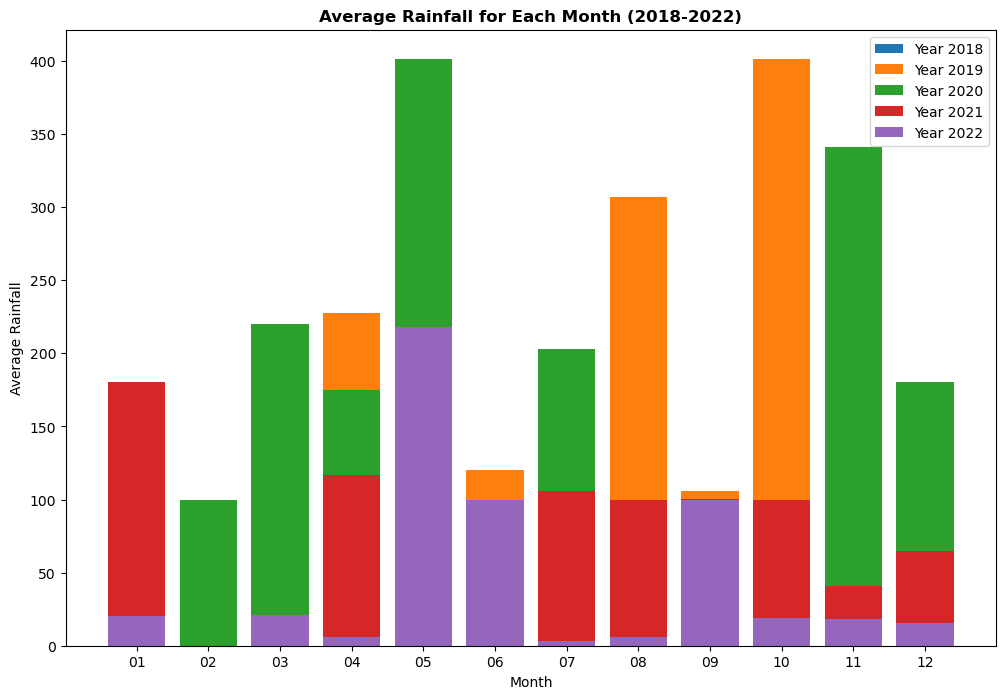

In [ ]:

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through each year
for year_col in ['Mean for 2018', 'Mean for 2019', 'Mean for 2020', 'Mean for 2021', 'Mean for 2022']:
    # Extract the year from the column name
    year = int(year_col.split()[-1])

    # Filter data for the current year
    df_year = df_output[df_output['Month'].astype(int) <= 12]

    # Plot the bar chart for the current year
    ax.bar(df_year['Month'], df_year[year_col], label=f'Year {year}')

# Set labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Average Rainfall')
ax.set_title('Average Rainfall for Each Month (2018-2022)', fontweight='bold')
ax.legend()

# Show the plot
plt.show()


Here, we are generating Marsabit region for only 2018 and 2019 to compare the rainfall for the different years.

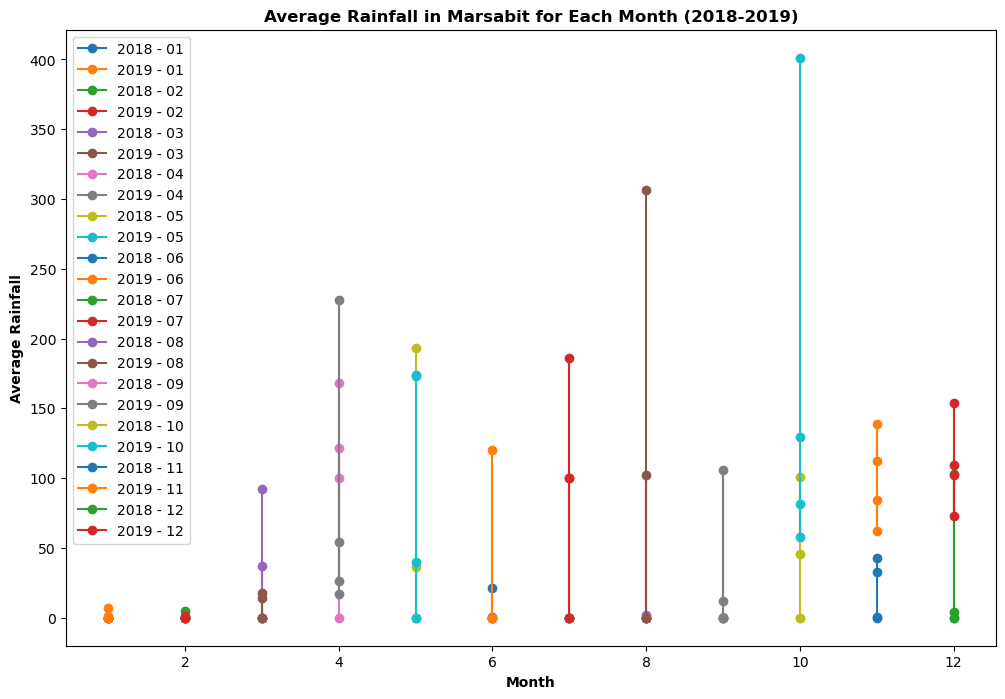

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through each month
for month in df_output['Month'].unique():
    # Filter data for the current month
    df_month = df_output[df_output['Month'] == month]

    # Plot the multiline chart for the current month
    ax.plot(df_month['S/NO'], df_month['Mean for 2018'], marker='o', label=f'2018 - {month}')
    ax.plot(df_month['S/NO'], df_month['Mean for 2019'], marker='o', label=f'2019 - {month}')

# Set labels and title
ax.set_xlabel('Month', fontweight = 'bold')
ax.set_ylabel('Average Rainfall', fontweight = 'bold')
ax.set_title('Average Rainfall in Marsabit for Each Month (2018-2019)', fontweight = 'bold')
ax.legend()

# Show the plot
plt.show()


We can visualize different charting styles and colors to deliver our final output in aesthetic and better understanding. 

The provided script visualizes the average rainfall in Marsabit for each month of the years 2018 and 2019. The bar chart displays the monthly averages, with distinct colors for each month and separate bars for each year, creating a clear comparison. Additionally, the x-axis is labeled with integers from 1 to 12 to represent the months.

End of Task !